## <u>Prediction of Health Insurance Charges by Linear Regression & Random Forest</u>

<h3> Aakash Tyagi</h3>

<h3> Abstract:</h3> In this project, we are assigned data about health insurance provider, and we aim to construct a model that could predict the individual medical charges incurred by a health insurance provider based on a handful of categorical and numeric attributes. Predicting the charges will require application of regression algorithms such as Linear Regression and Random Forest Regressor, etc. Before diving in to generation of model, there are some steps necessary to render our data into model understandable and usable format. Also, to understand the type of data we are dealing with, studying its features and statistical analysis of data is required.

<h3> Introduction:</h3>Classification and Regression are data mining techniques used to solve similar problems. Both are used in prediction analysis, classification assigns data into discrete categories but regression is used to predict a numeric or continuous value.

For example, classification would be in order if you wanted to organize houses into categories, such as walkability, lot size or crime rates. Regression would be used to predict a home's value based on its location, square feet, price when last sold, the price of similar homes, and other factors.

In [1]:
#Importing some packages and reading in the files

In [50]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
from sklearn.model_selection import cross_val_score, KFold
from sklearn import model_selection
from sklearn import linear_model
from sklearn import svm    
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

In [3]:
#Importing data
data=pd.read_csv("insurance.csv")

<h3>Dataset:</h3>The dataset is a collection of medical charges for 1338 instances. The objective is to predict the charges for customers based on the available information. Feature are as follows:

<b>age:</b> age of primary beneficiary.<br>
<b>sex:</b> Gender, female, male.<br>
<b>bmi:</b> Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
<b>children:</b> Number of children covered by health insurance.<br>
<b>smoker:</b> Smoking status (whether smokes or not)<br>
<b>region:</b> the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
<b>charges:</b> Individual medical charges billed by health insurance

<h3>Data Preprocessing:</h3>Finding and handling missing values, checking for valid column names and valid entries for those column, converting data-types of columns in to model acceptable formats and dealing with categorical variables (by generating dummy variables or by updating exisiting features with binary values). To make the data more manageable, we will change all binary string values (sex and smoker features) to binary numerical values (0 and 1). We will also convert the bmi numeric data into binary data. Regions is a non-binary categorical feature. 

In [4]:
#Data preprocessing

In [5]:
def map_smoker(data):
    mapped_result=[]
    
    for smoker in data:
        if smoker=="yes":
            mapped_result.append(1)
        else:
            mapped_result.append(0)
        
    return mapped_result

In [6]:
#if a person's BMI is greater than 30 then that person is considered as obese.
def map_bmi(column):
    mapped_result=[]
    for bmi in column:
        if bmi>30:
            mapped_result.append(1)
        else:
            mapped_result.append(0)
    return mapped_result

In [7]:
def map_sex(data):
    mapped_result=[]
    
    for user in data:
        if user=="male":
            mapped_result.append(1)
        else:
            mapped_result.append(0)
         
    return mapped_result

In [8]:
def map_region(data):
    mapped_result=[]
    
    for region in data:
        if region=="north":
            mapped_result.append(1)
        elif region=="northwest":
            mapped_result.append(2)
        elif region=="west":
            mapped_result.append(3)
        elif region=="southwest":
            mapped_result.append(4)
        elif region=="south":
            mapped_result.append(5)
        elif region=="southeast":
            mapped_result.append(6)
        elif region=="east":
            mapped_result.append(7)
        elif region=="northeast":
            mapped_result.append(8)
        else:
            mapped_result.append(-1)
        
    return mapped_result

In [9]:
def preprocess(data):
    data["smoker"]=map_smoker(data["smoker"])
    data["sex"]=map_sex(data["sex"])
    data["region"]=map_region(data["region"])
    data["bmi"]=map_bmi(data["bmi"])
    return data

In [10]:
data=preprocess(data)
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null int64
children    1338 non-null int64
smoker      1338 non-null int64
region      1338 non-null int64
charges     1338 non-null float64
dtypes: float64(1), int64(6)
memory usage: 73.2 KB


,age,sex,bmi,children,smoker,region,charges
0,19,0,0,0,1,4,16884.92400
1,18,1,1,1,0,6,1725.55230
2,28,1,1,3,0,6,4449.46200
3,33,1,0,0,0,2,21984.47061
4,32,1,0,0,0,2,3866.85520
5,31,0,0,0,0,6,3756.62160
6,46,0,1,1,0,6,8240.58960
7,37,0,0,3,0,2,7281.50560
8,37,1,0,2,0,8,6406.41070
9,60,0,0,0,0,2,28923.13692


<h3>Analysis of Data:</h3>Here we see that the dataset contains 1338 observations of 7 variables. The variable 'charges' is a float variable & is the one we have to predict. This means that this is a numerical variable containing a decimal. The variable charge can be predicted to make use of the following predictors: age, sex, bmi, children, smoker and region. In the summary statistics we also see that there are no missings in the dataset.

<h3>Data Visualization:</h3>To generate hidden insights from the data. For example, smokers are charged higher charges than non-smokers. Visualization is also required to figure out which features are responsible for changes in the target variable. This is called feature correlation.

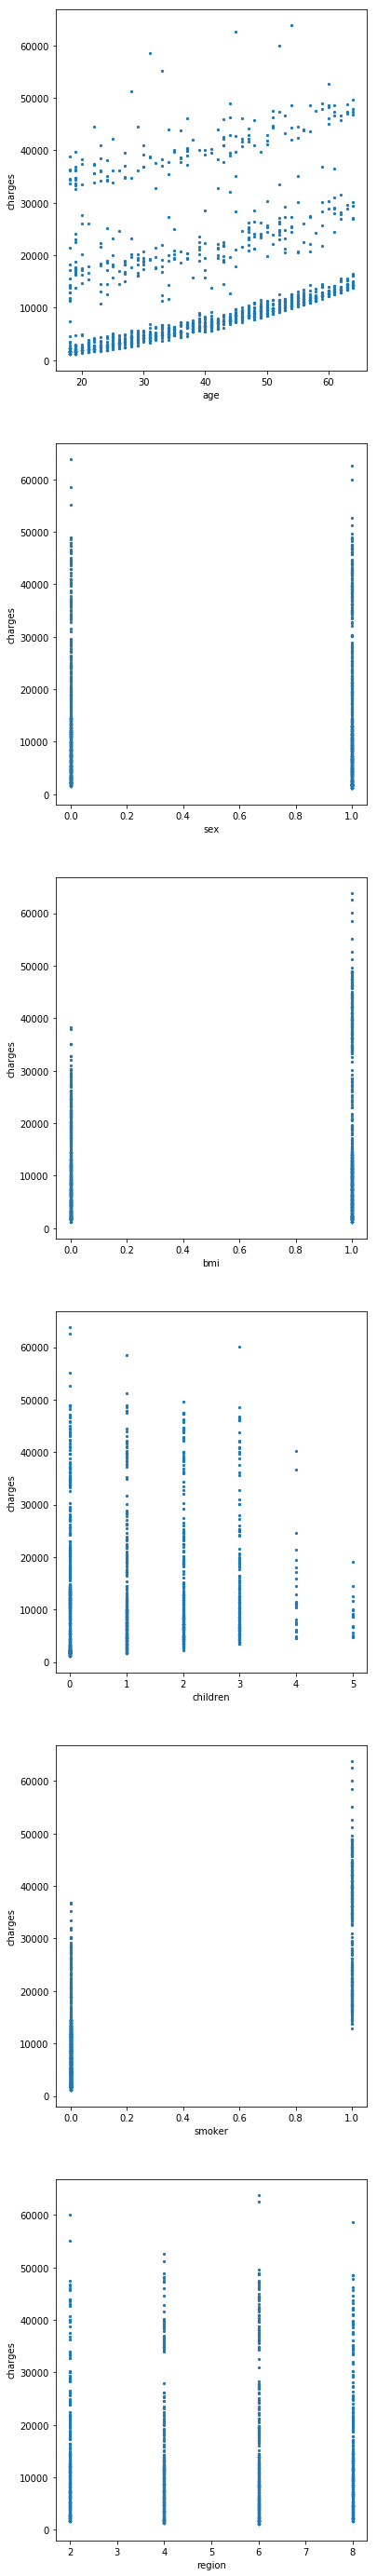

In [11]:
#Visualising data
n=data.shape[1]-1
fig,ax=plt.subplots(n,1,figsize=(6,50))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in data.columns if i not in ["charges"]]):
    ax[ind].scatter(data[col],data.charges,s=5)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges")    
plt.show()

<h3>Linear Regression:</h3>Regression is a data mining technique used to predict a range of numeric values (also called continuous values), given a particular dataset. For example, regression might be used to predict the cost of a product or service, given other variables.


Regression is used across multiple industries for business and marketing planning, financial forecasting, environmental modeling and analysis of trends.

In [12]:
#Applying Linear Regression without feature selection

In [13]:
def normalize(X):
    maxX = np.max(X, axis=0)
    minX = np.min(X, axis=0)
    X = (X-minX)/(maxX-minX)
    return X

In [14]:
def process(data):
    X = data.iloc[:,0:-1].values
    X=normalize(X)
    y = data.iloc[:,-1:].values 
    X = np.insert(X, 0, 1, axis=1)
    return X,y

In [15]:
X,y=process(data)

In [16]:
def error_mean(X,y,w):
    n=X.shape[0]
    difference=y-X@np.transpose(w);
    squared_mean_error= np.transpose(difference)@difference/(2*n)
    return np.asscalar(squared_mean_error)

In [17]:
def grad_mean(X,y,w):
    n=X.shape[0]
    hypothesis=X@np.transpose(w)
    return (np.transpose(hypothesis-y)@X)/n;

In [18]:

def fit(X,y,kappa,iter):
    w = np.zeros((1,X.shape[1]))
    E = []
    E.append(error_mean(X,y,w))

    while(iter > 0):
        w=w-kappa*grad_mean(X,y,w)
        E.append(error_mean(X,y,w))
        iter-=1
    return w,E


[[-8.49681579e+00  1.19503127e+04 -1.37742483e+02  4.21695020e+03
   2.37709001e+03  2.38326105e+04  4.30183810e+02]]


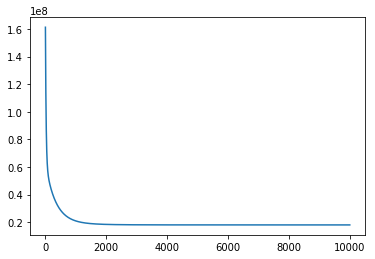

In [19]:
w,E = fit(X,y,0.01,10000)
print(w)
plt.plot(E)
plt.show()

In [20]:
def predict(X,w):
    return X@np.transpose(w)

In [21]:
print(error_mean(X,y,w))

18023490.018298794


<h3>Prediction Based on Linear Regression (without Feature Selection):</h3> Here we are using linear regression model on all the present attributes for the calculations & the graph is plotted between the actual values and the predicted values for analysis. we have also computed the mean squared error. Lets see if we can reduce the error cost by feature selection.


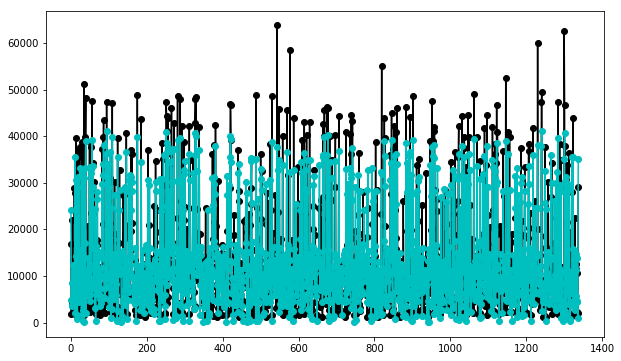

In [22]:
plt.figure(figsize=(10,6))

plt.plot( y,c = 'black', marker = 'o', label = 'Train data')
plt.plot(predict(X,w), c = 'c', marker = 'o', label = 'Test data')


<h3>Data Correlation:</h3> Here we are finding data correlation between the set of data in order to do feature selection.

In [23]:
#Linear Regression with feature selection

Text(0,0.5,'Absolute correlation')

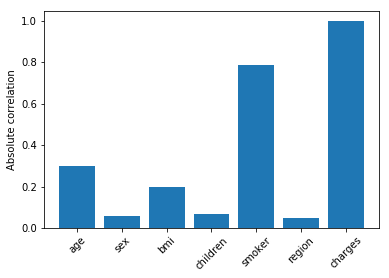

In [24]:
#Finding correlations in data
corr_vals=[]
collabel=[]
for col in [i for i in data.columns ]:
    p_val=sp.stats.pearsonr(data[col],data["charges"])
    corr_vals.append(np.abs(p_val[0]))
    collabel.append(col)
plt.bar(range(1,len(corr_vals)+1),corr_vals)
plt.xticks(range(1,len(corr_vals)+1),collabel,rotation=45)
plt.ylabel("Absolute correlation")

<h3>Prediction Based on Linear Regression (with Feature Selection):</h3> Apparently, smoking, age and obesity are the factors that contribute the most in the calculation of medical charges. We will only these features for our predictions. The graph is plotted between the actual values and the predicted values for analysis. 

In [25]:
def process_selected_features(data):
    
    #Using only the features that are highly correlated to the charges
    X = data[['age','smoker','bmi']].iloc[:,:].values
    X=normalize(X)
    y = data.iloc[:,-1:].values 
    X = np.insert(X, 0, 1, axis=1)
    return X,y

In [26]:
X,y=process_selected_features(data)

[[  608.91581003 12037.28902998 23850.30084489  4228.79906156]]


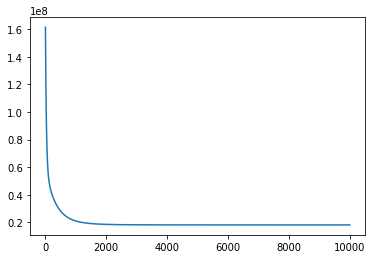

In [27]:
w,E = fit(X,y,0.01,10000)
print(w)
plt.plot(E)
plt.show()

In [28]:
print(error_mean(X,y,w))

18200919.462756056


<h3>Analysis:</h3> There are no visible changes in our calculations by doing feature selection on this data set. There is no change in the plotted graph whatsoever, it can be because of the nature of the dataset. We can add some more new features in the dataset in order to get better predicted results.

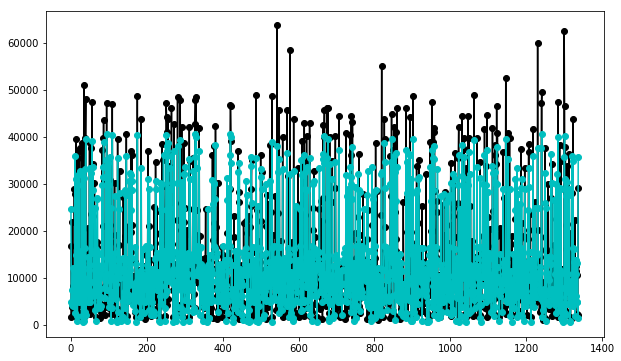

In [29]:
plt.figure(figsize=(10,6))

plt.plot( y,c = 'black', marker = 'o', 
          label = 'Train data')
plt.plot(predict(X,w),
          c = 'c', marker = 'o', 
          label = 'Test data')


<h3>K Fold Cross-Validation:</h3>In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. 

In [30]:
#Applying Linear Regression
#We will make our predictions using K-fold cross validation.
#In k-fold cross-validation, we create the testing and training sets by splitting the data into k equally sized subsets.


In [31]:
newcolumns=['age', 'bmi', 'smoker']

<h3>We will make our predictions using K-fold cross validation:</h3>
In k-fold cross-validation, we create the training and testing sets by splitting the data into k equally sized subsets. We then treat a single subsample as the testing set, and the remaining data as the training set. We then run and test models on all k datasets, and average the estimates. Let’s try it out with 10 folds and using Linear Regression:

In [32]:
kf=KFold(n_splits=10, random_state=1, shuffle=True)
intercepts=[]
mses=[]
coefs=[]

for train_index, test_index in kf.split(data[newcolumns]):
    
    lr=linear_model.LinearRegression()
    
    lr.fit(data[newcolumns].iloc[train_index],data["charges"].iloc[train_index])
    lr_predictions=lr.predict(data[newcolumns].iloc[test_index])
    lr_pred2=lr.predict(data[newcolumns].iloc[train_index])
    
    lr_mse=mean_squared_error(data["charges"].iloc[test_index],lr_predictions)
    
    intercepts.append(lr.intercept_)
    
    coefs.append(lr.coef_)
    mses.append(lr_mse)

In [33]:
#Calculating the mean squared error
print(lr_mse)


33259507.82119975


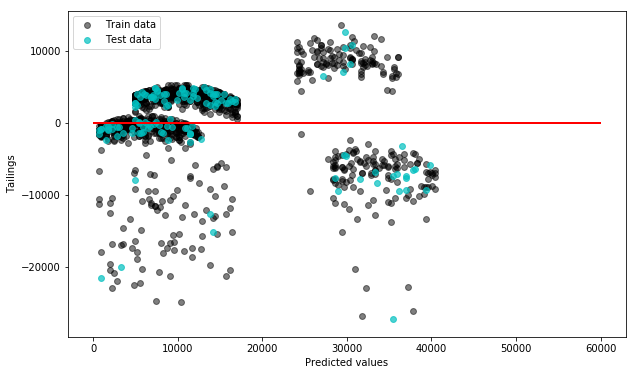

In [34]:
#Visualization of predicted results of test and train data.
plt.figure(figsize=(10,6))

plt.scatter( lr_pred2, lr_pred2 - data["charges"].iloc[train_index],
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(lr_predictions,lr_predictions - data["charges"].iloc[test_index],
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()


In [35]:
#Applying linear regression and calculating the r2 score.

In [36]:
x1 = data.drop(['charges'], axis = 1)
y1 = data.charges

x_train,x_test,y_train,y_test = train_test_split(x1,y1, random_state = 0)
lr1 = LinearRegression().fit(x_train,y_train)

y_train_pred = lr1.predict(x_train)
y_test_pred = lr1.predict(x_test)
print(mean_squared_error(y_test,y_test_pred))

print(lr1.score(x_test,y_test))

31890262.325998504
0.797437920309101


<h3>Linear Regression by adding new Polynomial Features: </h3> Here we are adding new polynomial feature in order to get the better predicted results, later we will compare these results with the Random Forest Regressor. We can also see that R2 score increased after adding new polynomial feature for linear regression. 

In [37]:
#Applying linear regression with adding new polynomial feature and calculating the new r2 score.

In [38]:
X1 = data.drop(['charges','region'], axis = 1)
Y1 = data.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X1)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y1, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)
print(mean_squared_error(Y_test,Y_test_pred))

print(plr.score(X_test,Y_test))

14912813.809862789
0.9052760824451958


<h2>Random Forest Regressor:</h2>Random forests, also known as random decision forests, are a popular ensemble method that can be used to build predictive models for both regression and classification problems. Ensemble methods use multiple learning models to gain better predictive results — in the case of a random forest, the model creates an entire forest of random uncorrelated decision trees to arrive at the best possible answer. Decision trees are simple but intuitive models that utilize a top-down approach in which the root node creates binary splits until a certain criteria is met. This binary splitting of nodes provides a predicted value based on the interior nodes leading to the terminal (final) nodes. In a classification context, a decision tree will output a predicted target class for each terminal node produced.


In [39]:
#Now applying another regression model: Random Forest.

In [40]:
forest = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1,n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)


In [41]:
#Printing Mean Squared Errors and r2 scores for test and train data.

In [42]:
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 6103120.634, MSE test data: 21102721.442
R2 train data: 0.957, R2 test data: 0.866


In [43]:
#Visualization of predicted results of test and train data.

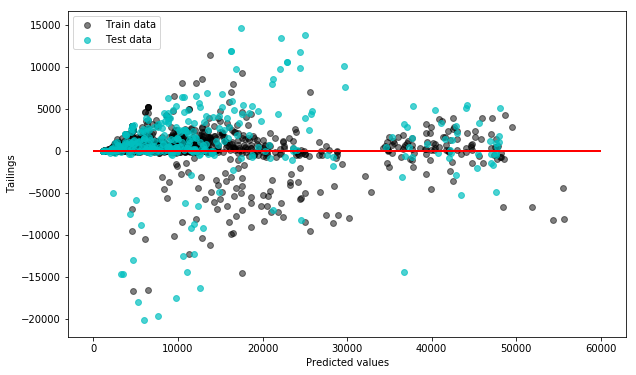

In [44]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

In [45]:
#Now calculating the LR coefficients in order to calculate the Charges.

In [46]:
rmse=[i**.5 for i in mses]
avg_rmse=np.mean(rmse)
avg_intercept=np.mean(intercepts)
age_coefs=[]
bmi_coefs=[]
smoking_coefs=[]
for vals in coefs:
    age_coefs.append(vals[0])
    bmi_coefs.append(vals[1])
    smoking_coefs.append(vals[2])
age_coef=np.mean(age_coefs)
bmi_coef=np.mean(bmi_coefs)
smoking_coef=np.mean(smoking_coefs)
print("a: ",age_coef," b: ",bmi_coef," c: ",smoking_coef," intercept: ",avg_intercept)

a:  261.83801848327676  b:  4227.7376009403615  c:  23851.06705386572  intercept:  -4107.422133255811


In [47]:
#After we obtain the LR coefficients.
#we define a function that will automatically predict a insurance cost value given age, bmi and smoking parameters.

In [48]:
def calculate_charges(age,bmi,smoking):
    y=(age_coef*age)+(bmi_coef*bmi)+(smoking_coef*smoking)+avg_intercept
    return y

<h3>Conclusion:</h3>
<h5>Linear Regression VS Random Forest Regression:</h5>For this dataset, We can clearly see that Random Forest Regressor is a better model choice with more accurate predicted values and less mean squared error as compared to the linear regression model. The accuracy and the predicted results of linear regression model gets better by adding new polynomial features. Mean squared error is significantly reduced by following this approach.<br>
<h5>Predicting Medical Charges:</h5> After calculating the coefficients, we have build a function to return the predicted charges results based on our model: Linear regression with K-fold Cross Validation. For example, a 34 year old, obese and smoker individual will have to pay the following price for his insurance:


In [49]:
print("Predicted Charges: ",calculate_charges(34,1,1))

Predicted Charges:  32873.875149981686
